<a href="https://colab.research.google.com/github/Ayman-Abdeen/Data-Science/blob/main/udemy-project%20/udemy-eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Udemy EDA

Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

loading Data

In [2]:
rawdf = pd.read_csv('/content/udemy_courses-raw.csv')

In [3]:
rawdf.head(3)

course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   
2    1006314  Financial Modeling for Business Analysts and C...   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True    200   
1      https://www.udemy.com/goods-and-services-tax/     True     75   
2  https://www.udemy.com/financial-modeling-for-b...     True     45   

   num_subscribers  num_reviews  num_lectures               level  \
0             2147           23            51          All Levels   
1             2792          923           274          All Levels   
2             2174           74            51  Intermediate Level   

   content_duration   published_timestamp           subject  
0               1.5  2017-01-18T20:58:58Z  Business Finance  
1              39.0  2017-03-09T16:34:20Z  Business Finance  
2               2.5  2016-12-19T19:26:30Z  Business Finance

In [4]:
rawdf.sample(3)

course_id                                       course_title  \
1307     640428  Make tech circles in Adobe Illustrator in 30 m...   
2538     911474        Complete Wordpress Theme Development Course   
133     1188178               Forex Trading for Beginners - Basics   

                                                    url  is_paid  price  \
1307  https://www.udemy.com/make-tech-circles-in-ado...     True    200   
2538  https://www.udemy.com/complete-wordpress-theme...     True    150   
133   https://www.udemy.com/complete-forex-trading-f...     True     50   

      num_subscribers  num_reviews  num_lectures       level  \
1307              821           15             5  All Levels   
2538             1050          223            64  All Levels   
133               989            9            11  All Levels   

      content_duration   published_timestamp           subject  
1307          0.533333  2015-10-14T21:42:40Z    Graphic Design  
2538          6.500000  2016-07-23T20:07:17Z   Web Development  
133           1.000000  2017-04-24T16:42:56Z  Business Finance

In [5]:
rawdf.shape

(3678, 12)

In [6]:
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [7]:
rawdf.describe().round(2)

course_id    price  num_subscribers  num_reviews  num_lectures  \
count     3678.00  3678.00          3678.00      3678.00       3678.00   
mean    675971.96    66.05          3197.15       156.26         40.11   
std     343273.16    61.01          9504.12       935.45         50.38   
min       8324.00     0.00             0.00         0.00          0.00   
25%     407692.50    20.00           111.00         4.00         15.00   
50%     687917.00    45.00           911.50        18.00         25.00   
75%     961355.50    95.00          2546.00        67.00         45.75   
max    1282064.00   200.00        268923.00     27445.00        779.00   

       content_duration  
count           3678.00  
mean               4.09  
std                6.05  
min                0.00  
25%                1.00  
50%                2.00  
75%                4.50  
max               78.50

Data Pre-processing

In [25]:
rawdf.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [29]:
rawdf['published_timestamp'] = pd.to_datetime(rawdf['published_timestamp'])

In [30]:
rawdf.dtypes

course_id                            int64
course_title                        object
url                                 object
is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

In [ ]:
rawdf.set_index('published_timestamp', inplace=True)

In [26]:
rawdf['subject'].value_counts()

subject
Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: count, dtype: int64

In [39]:
rawdf['level'].value_counts()

level
All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

In [28]:
rawdf['is_paid'].value_counts()

is_paid
True     3368
False     310
Name: count, dtype: int64

In [31]:
rawdf['year'] = rawdf['published_timestamp'].dt.year

In [32]:
rawdf['month'] = rawdf['published_timestamp'].dt.month_name()

In [33]:
rawdf['Day'] = rawdf['published_timestamp'].dt.day_name()

In [34]:
rawdf['quarter'] = rawdf['published_timestamp'].dt.quarter

In [41]:
rawdf['price'].value_counts()

price
20     830
50     468
0      310
200    295
40     217
30     166
25     154
95     152
100    133
195    127
35     116
150     88
45      83
75      81
60      75
120     37
55      35
85      31
125     30
65      30
80      29
145     27
70      26
90      19
180     17
115     16
175     13
105     11
190     10
140     10
110      8
135      8
165      6
185      6
170      5
160      4
130      3
155      2
Name: count, dtype: int64

In [40]:
rawdf['Profit'] = rawdf['price'] * rawdf['num_subscribers']

In [42]:
rawdf.shape

(3678, 16)

In [45]:
rawdf['course_id'].nunique()

3672

In [51]:
rawdf.duplicated().sum()

6

In [49]:
rawdf[rawdf.duplicated()]

course_id  \
published_timestamp                    
2016-05-16 18:28:30+00:00     837322   
2017-04-23 16:19:01+00:00    1157298   
2016-12-15 14:56:17+00:00    1035638   
2017-07-02 14:29:35+00:00    1084454   
2014-04-15 21:48:55+00:00     185526   
2013-01-03 00:55:31+00:00      28295   

                                                                course_title  \
published_timestamp                                                            
2016-05-16 18:28:30+00:00  Essentials of money value: Get a financial Life !   
2017-04-23 16:19:01+00:00  Introduction to Forex Trading Business For Beg...   
2016-12-15 14:56:17+00:00                 Understanding Financial Statements   
2017-07-02 14:29:35+00:00                  CFA Level 2- Quantitative Methods   
2014-04-15 21:48:55+00:00                             MicroStation - Células   
2013-01-03 00:55:31+00:00  Learn Web Designing & HTML5/CSS3 Essentials in...   

                                                                         url  \
published_timestamp                                                            
2016-05-16 18:28:30+00:00   https://www.udemy.com/essentials-of-money-value/   
2017-04-23 16:19:01+00:00  https://www.udemy.com/introduction-to-forex-tr...   
2016-12-15 14:56:17+00:00  https://www.udemy.com/understanding-financial-...   
2017-07-02 14:29:35+00:00  https://www.udemy.com/cfa-level-2-quantitative...   
2014-04-15 21:48:55+00:00        https://www.udemy.com/microstation-celulas/   
2013-01-03 00:55:31+00:00  https://www.udemy.com/build-beautiful-html5-we...   

                           is_paid  price  num_subscribers  num_reviews  \
published_timestamp                                                       
2016-05-16 18:28:30+00:00     True     20                0            0   
2017-04-23 16:19:01+00:00     True     20                0            0   
2016-12-15 14:56:17+00:00     True     25                0            0   
2017-07-02 14:29:35+00:00     True     40                0            0   
2014-04-15 21:48:55+00:00     True     20                0            0   
2013-01-03 00:55:31+00:00     True     75            43285          525   

                           num_lectures           level  content_duration  \
published_timestamp                                                         
2016-05-16 18:28:30+00:00            20      All Levels          0.616667   
2017-04-23 16:19:01+00:00            27  Beginner Level          1.500000   
2016-12-15 14:56:17+00:00            10      All Levels          1.000000   
2017-07-02 14:29:35+00:00            35      All Levels          5.500000   
2014-04-15 21:48:55+00:00             9  Beginner Level          0.616667   
2013-01-03 00:55:31+00:00            24      All Levels          4.000000   

                                    subject  year     month       Day  \
published_timestamp                                                     
2016-05-16 18:28:30+00:00  Business Finance  2016       May    Monday   
2017-04-23 16:19:01+00:00  Business Finance  2017     April    Sunday   
2016-12-15 14:56:17+00:00  Business Finance  2016  December  Thursday   
2017-07-02 14:29:35+00:00  Business Finance  2017      July    Sunday   
2014-04-15 21:48:55+00:00    Graphic Design  2014     April   Tuesday   
2013-01-03 00:55:31+00:00   Web Development  2013   January  Thursday   

                           quarter   Profit  
published_timestamp                          
2016-05-16 18:28:30+00:00        2        0  
2017-04-23 16:19:01+00:00        2        0  
2016-12-15 14:56:17+00:00        4        0  
2017-07-02 14:29:35+00:00        3        0  
2014-04-15 21:48:55+00:00        2        0  
2013-01-03 00:55:31+00:00        1  3246375

In [53]:
rawdf.drop_duplicates(inplace=True)

In [54]:
rawdf['content_duration'].value_counts()

content_duration
1.000000     606
1.500000     506
2.000000     419
2.500000     269
3.000000     248
            ... 
0.483333       1
78.500000      1
70.000000      1
0.000000       1
66.500000      1
Name: count, Length: 105, dtype: int64

In [55]:
rawdf['content_duration'].sort_values()

published_timestamp
2015-12-17 05:38:38+00:00     0.000000
2017-05-01 18:50:43+00:00     0.133333
2016-10-10 21:05:19+00:00     0.316667
2015-03-27 17:16:21+00:00     0.450000
2015-12-07 18:36:33+00:00     0.466667
                               ...    
2013-10-16 11:37:30+00:00    68.500000
2014-03-07 15:13:45+00:00    70.000000
2014-12-22 16:57:30+00:00    71.500000
2015-11-09 22:01:02+00:00    76.500000
2016-10-11 21:40:06+00:00    78.500000
Name: content_duration, Length: 3672, dtype: float64

In [59]:
rawdf['duration'] = pd.qcut(rawdf['content_duration'] , 6 , ['0:1','1:3','3:7','7:12','12:20','20+'] )

In [60]:
rawdf.rename(columns={'duration':'duration_category'}, inplace=True)

In [61]:
rawdf['duration_category'].value_counts()

duration_category
0:1      931
7:12     699
20+      590
12:20    527
1:3      506
3:7      419
Name: count, dtype: int64

In [62]:
rawdf['price'].value_counts()

price
20     827
50     468
0      310
200    295
40     216
30     166
25     153
95     152
100    133
195    127
35     116
150     88
45      83
75      80
60      75
120     37
55      35
85      31
125     30
65      30
80      29
145     27
70      26
90      19
180     17
115     16
175     13
105     11
190     10
140     10
110      8
135      8
165      6
185      6
170      5
160      4
130      3
155      2
Name: count, dtype: int64

In [63]:
price_dict = {
    0: 'Free',
    range(20,55,5): '20-55',
    range(55,105,5): '55-100',
    range(105,155,5): '105-150',
    range(155,205,5): '155-200',
}


In [64]:
rawdf['price_category'] = rawdf['price'].replace(price_dict)

Exploratort Data Analysis (EDA)

In [ ]:
!pip install pandas-profiling

In [ ]:
!pip install ydata-profiling

In [18]:
from pandas_profiling import ProfileReport

In [20]:
from ydata_profiling import ProfileReport
profile_report = ProfileReport(rawdf)

In [23]:
profile_report

In [24]:
# saving to html format
profile_report.to_file("output.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [65]:
rawdf.sample(3)

course_id  \
published_timestamp                    
2016-11-22 17:55:42+00:00    1018530   
2016-05-16 18:28:30+00:00     837322   
2016-03-23 15:33:31+00:00     799912   

                                                                course_title  \
published_timestamp                                                            
2016-11-22 17:55:42+00:00                Cakephp:Creating a CRUD application   
2016-05-16 18:28:30+00:00  Essentials of money value: Get a financial Life !   
2016-03-23 15:33:31+00:00               Alto Saxophone Lessons For Beginners   

                                                                         url  \
published_timestamp                                                            
2016-11-22 17:55:42+00:00  https://www.udemy.com/cakephpcreating-a-crud-a...   
2016-05-16 18:28:30+00:00   https://www.udemy.com/essentials-of-money-value/   
2016-03-23 15:33:31+00:00  https://www.udemy.com/the-music-coach-online-a...   

                           is_paid  price  num_subscribers  num_reviews  \
published_timestamp                                                       
2016-11-22 17:55:42+00:00     True     40              803            2   
2016-05-16 18:28:30+00:00     True     20                0            0   
2016-03-23 15:33:31+00:00     True     95               51            7   

                           num_lectures           level  content_duration  \
published_timestamp                                                         
2016-11-22 17:55:42+00:00             7      All Levels          0.516667   
2016-05-16 18:28:30+00:00            20      All Levels          0.616667   
2016-03-23 15:33:31+00:00            42  Beginner Level          3.000000   

                                       subject  year     month        Day  \
published_timestamp                                                         
2016-11-22 17:55:42+00:00      Web Development  2016  November    Tuesday   
2016-05-16 18:28:30+00:00     Business Finance  2016       May     Monday   
2016-03-23 15:33:31+00:00  Musical Instruments  2016     March  Wednesday   

                           quarter  Profit duration_category price_category  
published_timestamp                                                          
2016-11-22 17:55:42+00:00        4   32120               0:1          20-55  
2016-05-16 18:28:30+00:00        2       0               0:1          20-55  
2016-03-23 15:33:31+00:00        1    4845              7:12         55-100

#Subject
###1] uni-variate Analysis

how many courses in each subject ?

In [67]:
rawdf['subject'].value_counts()

subject
Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64

<Axes: xlabel='subject'>

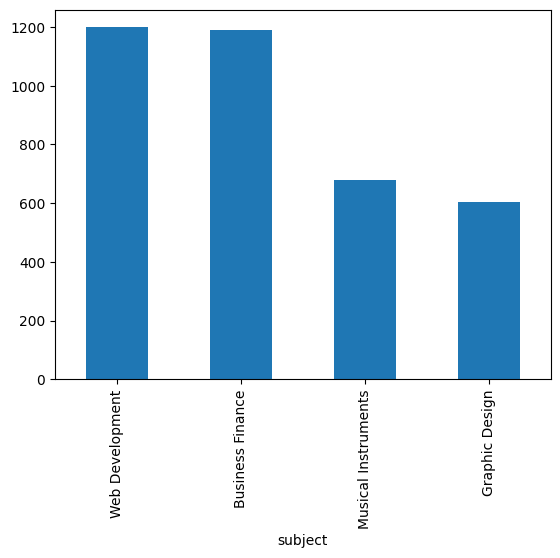

In [68]:
rawdf['subject'].value_counts().plot(kind='bar')